In [114]:
import pandas as pd
from tqdm import tqdm
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
all_df = pd.read_csv("tweet_all.csv", lineterminator="\n")
df = all_df.copy()

In [108]:
df.head(1)

,tweet_id,combined_text,time,favourites_count,followers_count,friends_count,statuses_count,rt_status,state,token_list
0,1223471140317909004,Veteran journo canned after making ‘racist’ jo...,02-01-2020,28128,4478,4826,42564,0,Tennessee,"['veteran', 'journo', 'racist', 'joke', 'https..."


In [109]:
j = 0
for i in range(len(df)):
    if "000" in df.iloc[i]['combined_text']:
        print(df.iloc[i]['combined_text'])
        j += 1
        if j >5:
            break

#Coronavirus: Stunning new numbers. Running totals - 9,171 confirmed cases worldwide vs 7,711 China cases yesterday; 213 deaths vs 130 yesterday. More than 12,000 suspected cases.  1,476 in serious or critical condition. ALL regions of China are reporting cases. h/t @V2019N 
1 full month into 2020:
Australia apocalyptic fires.
Coronavirus at 11,000+ infected.
Brexit finalized.
1st Impeachment trial in History where witnesses blocked.
Near War with Iran.
What else am I missing? 
RT @spectatorindex: CORONAVIRUS

- 259 deaths
- 1800 people in serious condition
- Around 12,000 confirmed cases 
Pakistan to get #coronavirus detection kits from Japan today which would enable health officials to test at least 1,000 samples. US @CDCgov is also expected to send test kits
https://t.co/8z5hDPhdzN 
The SARS outbreak in 2003 infected nearly 10000 people in 9 months. In contrast, the 2019-nCoV is continuously rising at 9700 cases in just a span of 1 month. How can you tell people to just drink their 

# Topic Modeling

In [64]:
# 10 top words
key_words = ["test", "trump", "vaccine", "death", "day", "state", "need", "like", "time", "health"]

In [2]:
month1 = ["China, spread, outbreak, health, test, trump, world, confirm, american, chinese", "China, trump, like, outbreak, quarantine, wuhan, cruise, confirm, chinese, test", "Trump, outbreak, china, report, fear, spread, state, american, day, news", "China, trump, spread, outbreak, death, response, wuhan, patient, know, official", "China, death, health, news, trump, confirm, outbreak, report, test, patient"]
month2 = ["Trump, state, need, test, health, help, know, spread, response, report", "Test, like, trump, health, spread, know, day, china, president, report", "Test, positive, trump, work, time, cancel, spread, like, outbreak, day", "Response, trump, test, time, help, stay, home, spread, day, update", "Trump, test, death, china, news, spread, bill, day, know, american"]
month3 = ["Death, test, trump, need, time, 000, state, want, help, like", "Trump, test, death, like, help, american, use, country, need, news", "Trump, death, state, test, die, report, week, day, @realdonaldtrump, china", "Test, work, trump, health, time, state, death, die, today, need", "Death, test, know, help, trump, time, state, need, home, patient"]
month4 = ["Trump, death, day, state, help, time, die, work, president, way", "Test, state, trump, death, home, day, health, die, response, need", "Death, trump, state, need, work, die, american, country, help, time", "Test, death, like, 000, time, american, patient, home,need, work", "Test, death, trump, health, 000, home, like, time, day, number"]
month5 = ["Death, mask, trump, test, today, spread, help, protest, like, need", "Test, trump, death, state, country, time, day, june, week, mask", "Test, trump, state, need, health, know, american, hospital, like, positive", "State, day, like, mask, report, death, number, health, trump, american", "Test, trump, positive, death, day, report, health, work, spread, rally"]
month6 = ["Mask, test, death, trump, like, need, million, day, year, know", "Test, state, death, day, report, mask, positive, trump, need, work", "Trump, die, 000, death, @realdonaldtrump, like, time, test, its, want", "School, trump, day, die, test, state, like, help, death, health", "Death, trump, test, positive, mask, time, like, know, need, life"]
month7 = ["Day, school, trump, die, test, death, week, state, know, vaccine", "Trump, death, million, state, health, time, die, need, test, president", "Trump, die, help, health, like, test, mask, day, time, 000", "Death, test, american, need, time, report, trump, work, die, state", "Test, trump, want, mask, like, positive, death, state, year, school"]
month8 = ["000, death, trump, state, die, time, american, day, need, life", "Test, die, know, death, mask, positive, @realdonaldtrump, work, trump, day", "Trump, like, time, death, school, american, know, mask, need, vaccine", "Trump, test, death, american, 000, day, year, positive, report, president", "Trump, vaccine, die, state, health, report, need, mask, school, death"]
month9 = ["Test, trump, @realdonaldtrump, health, mask, death, american, 000, positive, work", "Trump, test, positive, american, vaccine, vote, president, white, house, die", "Trump, death, test, mask, president, time, @realdonaldtrump, biden, bad, 000", "Trump, like, test, president, death, positive, biden, need, know, @realdonaldtrump", "Test, positive, day, trump, death, die, president, mask, @realdonaldtrump, need"]
month10 = ["Test, death, know, vaccine, day, work, like, positive, year, its", "Test, trump, 000, state, time, need, health, year, death, today", "Trump, biden, day, number, test, time, want, today, state, vaccine", "Day, death, week, test, like, @realdonaldtrump, american, need, election, know", "Mask, test, positive, trump, vaccine, die, wear, right, lockdown, death"]
month11 = ["Vaccine, trump, death, test, need, relief, like, year, time, work", "Vaccine, die, american, death, day, bill, test, year, help, mask", "Vaccine, test, now, relief, like, day, health, die, time, come", "Vaccine, need, american, death, bill, know, test, state, year, relief", "Vaccine, test, state, death, day, time, home, year, today, mask"]
month12 = ["Vaccine, test, death, trump, day, 000, like, state, biden, mask", "Vaccine, test, state, week, death, like, positive, health, die, life", "Vaccine, biden, time, trump, year, day, death, today, test, state", "Vaccine, death, year, die, day, time, mask, work, home, report", "Vaccine, test, need, like, work, health, time, state, day, vaccination"]
month13 = ["Vaccine, test, help, death, state, biden, health, work, week, day", "Vaccine, death, relief, like, need, american, help, time, know, report", "Year, vaccine, death, day, time, health, die, like, biden, know", "Vaccine, school, relief, year, work, mask, day,  help, vaccination, like", "Vaccine, test, 000, need, year, way, like, think, million, work"]
month14 = ["Vaccine, year, relief, death, health, state, today, use, day, bill", "Vaccine, state, need, bill, help, death, like, relief, vaccinate, mask", "Vaccine, year, health, time, today, test, news, day, vaccinate, death", "Test, vaccine, relief, year, like, bill, need, work, help, time", "Vaccine, biden, death, vaccination, relief, state, like, bill, day, american"]
month15 = ["Vaccine, day, need, death, state, mask, year, vaccinate, number, vaccination", "Vaccine, test, year, know, death, report, work, health, state, need", "Vaccine, like, vaccinate, year, health, india, vaccination, test, life, know", "Vaccine, shot, need, help, year, today, time, vaccination, vaccinate, work", "Vaccine, health, death, time, mask, india, use, report, test, johnson"]
month16 = ["Vaccine, like, year, report, vaccinate, day, health, need, vaccination, death", "Death, state, vaccine, vaccinate, vaccination, day, india, time, need, world", "Year, vaccine, like, help, know, work, day, need, india, vaccination", "Vaccine, mask, death, year, help, vaccine, work, die, day, know", "Time, test, vaccine, need, work, vaccinate, mask, year, health, come"]
month17 = ["Vaccinate, die, test, death, variant, like, time, american, year, delta", "Vaccine, need, death, test, state, year, china, like, vaccination, know", "Vaccine, health, work, year, day, trump, time, month, life, state", "Vaccine, death, vaccination, vaccinate, year, day, mask, report, state, health", "Vaccine, vaccinate, like, death, health, work, time, need, state, million"]
month18 = ["Vaccine, like, know, test, die, year, mask, need, state, want", "Vaccine, #whatshappeninginmyanmar, vaccinate, junta, help, need, mask, variant, delta, military", "Vaccine, vaccinate, death, unvaccinated, health, time, variant, state, die, delta", "Day, death, vaccinate, vaccine, #whatshappeninginmyanmar, help, test, country, need, junta", "#whatshappeninginmyanmar, need, vaccine, test, mask, vaccinate, die, junta, help, positive"]
month19 = ["Vaccinate, vaccine, die, day, mask, death, old, year, young, 000", "Vaccine, vaccinate, florida, work, unvaccinated, death, variant, hospital, bad, state", "Vaccine, vaccinate, american, work, day, like, its, floor, icu, die", "Work, its, floor, patient, vaccine, hospital, time, entire, capacity, data", "Mask, vaccine, like, vaccinate, state, dont, wear, start, day, stop"]





In [3]:
month_dict = {}

In [24]:
m = []
for i in month19:
    i = i.lower()
    m.append(i.replace(" ", "").split(","))
month_dict["month19"] = m

In [25]:
month_dict.keys()

dict_keys(['month1', 'month2', 'month3', 'month4', 'month5', 'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'month12', 'month13', 'month14', 'month15', 'month16', 'month17', 'month18', 'month19'])

# Word Embedding

In [26]:
month_list = []
for i in tqdm(range(1, 20)):
    file = f"month{i}"
    words = [j for i in month_dict[file] for j in i]
    month_list.append(words)

100%|██████████| 19/19 [00:00<00:00, 72250.02it/s]


In [51]:
twitter_words_list = [j for i in month_list for j in i]
Counter(twitter_words_list).most_common(10)

[('death', 68),
 ('test', 64),
 ('vaccine', 52),
 ('trump', 51),
 ('day', 48),
 ('state', 43),
 ('need', 42),
 ('like', 41),
 ('time', 39),
 ('health', 32)]

In [31]:
model = Word2Vec(sentences=month_list, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec2.model")

In [32]:
model.wv.most_similar("china")

[('white', 0.2604372203350067),
 ('vaccination', 0.24948769807815552),
 ('floor', 0.23851986229419708),
 ('vote', 0.22895987331867218),
 ('capacity', 0.22462581098079681),
 ('johnson', 0.21955731511116028),
 ('need', 0.21908605098724365),
 ('work', 0.20144860446453094),
 ('patient', 0.19781222939491272),
 ('wuhan', 0.1965176910161972)]

In [105]:
for i in key_words:
    print(i, model.wv.most_similar(i))

test [('report', 0.36819738149642944), ('mask', 0.35311612486839294), ('work', 0.3441620171070099), ('death', 0.33949097990989685), ('know', 0.32349321246147156), ('biden', 0.30247578024864197), ('day', 0.3017154037952423), ('help', 0.2911866009235382), ('spread', 0.2837197780609131), ('vaccine', 0.2822891175746918)]
trump [('mask', 0.3713188171386719), ('state', 0.34354135394096375), ('know', 0.3386659622192383), ('need', 0.30096176266670227), ('time', 0.2994699776172638), ('vaccine', 0.2846207618713379), ('military', 0.28415003418922424), ('death', 0.27353182435035706), ('test', 0.26949524879455566), ('day', 0.264039009809494)]
vaccine [('mask', 0.5580952763557434), ('day', 0.5069568753242493), ('time', 0.46462514996528625), ('need', 0.46118855476379395), ('old', 0.43926846981048584), ('death', 0.4326122999191284), ('report', 0.43052634596824646), ('die', 0.3836495876312256), ('patient', 0.3797999918460846), ('000', 0.3765576183795929)]
death [('mask', 0.5646297931671143), ('american

test ('report', 0.36819738149642944), ('mask', 0.35311612486839294), ('work', 0.3441620171070099), ('death', 0.33949097990989685), ('know', 0.32349321246147156), ('biden', 0.30247578024864197), ('day', 0.3017154037952423), ('help', 0.2911866009235382), ('spread', 0.2837197780609131), ('vaccine', 0.2822891175746918)]  

trump ('mask', 0.3713188171386719), ('state', 0.34354135394096375), ('know', 0.3386659622192383), ('need', 0.30096176266670227), ('time', 0.2994699776172638), ('vaccine', 0.2846207618713379), ('military', 0.28415003418922424), ('death', 0.27353182435035706), ('test', 0.26949524879455566), ('day', 0.264039009809494)]
vaccine ('mask', 0.5580952763557434), ('day', 0.5069568753242493), ('time', 0.46462514996528625), ('need', 0.46118855476379395), ('old', 0.43926846981048584), ('death', 0.4326122999191284), ('report', 0.43052634596824646), ('die', 0.3836495876312256), ('patient', 0.3797999918460846), ('000', 0.3765576183795929)]

death ('mask', 0.5646297931671143), ('american', 0.48611924052238464), ('health', 0.45995184779167175), ('die', 0.4548462927341461), ('day', 0.45319780707359314), ('year', 0.4435684084892273), ('like', 0.44135570526123047), ('vaccine', 0.43261224031448364), ('need', 0.4255771040916443), ('military', 0.3973653018474579)]

day ('vaccine', 0.5069568753242493), ('work', 0.48885291814804077), ('mask', 0.4703267514705658), ('death', 0.45319774746894836), ('die', 0.4488166570663452), ('state', 0.42559459805488586), ('patient', 0.402073472738266), ('american', 0.39144569635391235), ('need', 0.3901756703853607), ('bill', 0.3796852231025696)]

state ('mask', 0.47918638586997986), ('day', 0.4255945682525635), ('vaccine', 0.3729817569255829), ('old', 0.3559585511684418), ('trump', 0.3435414433479309), ('death', 0.3385370969772339), ('bill', 0.33089569211006165), ('official', 0.3283293545246124), ('need', 0.3193055987358093), ('time', 0.31325259804725647)]

need ('patient', 0.5214478373527527), ('vaccine', 0.46118852496147156), ('death', 0.4255770444869995), ('american', 0.40033990144729614), ('day', 0.39017564058303833), ('#whatshappeninginmyanmar', 0.38749581575393677), ('mask', 0.38125312328338623), ('@realdonaldtrump', 0.3803459107875824), ('year', 0.3610862195491791), ('report', 0.3481590747833252)]

like ('positive', 0.49619781970977783), ('mask', 0.463130384683609), ('death', 0.4413556754589081), ('patient', 0.391098290681839), ('american', 0.38894155621528625), ('year', 0.386701762676239), ('vaccine', 0.34503811597824097), ('day', 0.336894154548645), ('report', 0.32260966300964355), ('need', 0.31703346967697144)]

time ('vaccine', 0.4646250605583191), ('mask', 0.4065384864807129), ('death', 0.3954877555370331), ('biden', 0.3865664601325989), ('bad', 0.3475462794303894), ('state', 0.31325262784957886), ('#whatshappeninginmyanmar', 0.31285420060157776), ('positive', 0.31244853138923645), ('year', 0.3116542398929596), ('need', 0.30982816219329834)]

health ('death', 0.459951788187027), ('unvaccinated', 0.33400240540504456), ('response', 0.3096548616886139), ('capacity', 0.30875086784362793), ('india', 0.3025979995727539), ('mask', 0.28254398703575134), ('week', 0.2709379196166992), ('time', 0.26664578914642334), ('need', 0.256672203540802), ('report', 0.2539218068122864)

In [106]:
key_words_dict = {}
for i in key_words:
    key_words_dict[i] = []
    for j in month_list:
        if i in j:
            key_words_dict[i].append(1)
        else:
            key_words_dict[i].append(0)

In [107]:
key_words_dict

{'test': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 'trump': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
 'vaccine': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'death': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'day': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'state': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'need': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 'like': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'time': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'health': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]}

# Compare Word2Vec Model

In [35]:
model_bing = Word2Vec.load("word2vec.model")
model_twitter = Word2Vec.load("word2vec2.model")

In [36]:
keyword_bing = ['coronavirus', 'covid', 'update', 'stimulus', 'vaccine', '19', 'county', 'testing', 'cases', 'check']
keyword_twitter = ['test', 'trump', 'vaccine', 'death', 'day', 'state', 'need', 'like', 'time', 'health']

In [37]:
keywords = ["coronavirus", "vaccine", "test", "china"]

In [122]:
word = "spread"

In [123]:
model_bing.wv.most_similar(word)

[('start', 0.9192627668380737),
 ('did', 0.8798500299453735),
 ('begin', 0.8790737986564636),
 ('human', 0.8751499056816101),
 ('america', 0.8723804950714111),
 ('real', 0.8700886964797974),
 ('survive', 0.8529237508773804),
 ('come', 0.8517111539840698),
 ('2019-ncov', 0.8511253595352173),
 ('pope', 0.8447325229644775)]

In [124]:
model_twitter.wv.most_similar(word)

[('test', 0.2837197780609131),
 ('help', 0.2835283577442169),
 ('shot', 0.2373194545507431),
 ('year', 0.22849369049072266),
 ('floor', 0.2255677431821823),
 ('home', 0.201443612575531),
 ('health', 0.18834492564201355),
 ('die', 0.18777668476104736),
 ('mask', 0.18119171261787415),
 ('india', 0.17801246047019958)]

In [ ]:
"vaccine", "death", "mask", "american", "chinese", "die", "000"

In [119]:
y = ["mask", "vaccine", "death", "old", "bill", "state", "american", "start", "day", "stop"]
x = [0.39, 0.38, 0.37, 0.34, 0.33, 0.3, 0.3, 0.29, 0.29, 0.28]

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

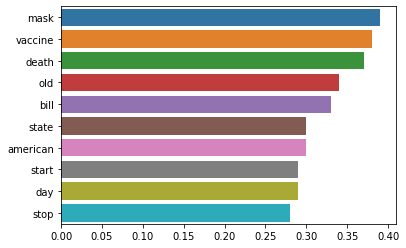

In [121]:
# plt.figure(figsize=(15,15))
sns.barplot(x, y)